## Fit ARIMA model for Fair_poor

                               SARIMAX Results                                
Dep. Variable:              Fair_Poor   No. Observations:                   76
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -194.609
Date:                Tue, 01 Apr 2025   AIC                            393.219
Time:                        17:32:57   BIC                            397.854
Sample:                             0   HQIC                           395.069
                                 - 76                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5048      0.096     -5.238      0.000      -0.694      -0.316
sigma2        10.4623      2.008      5.211      0.000       6.527      14.398
Ljung-Box (L1) (Q):                   1.05   Jarque-

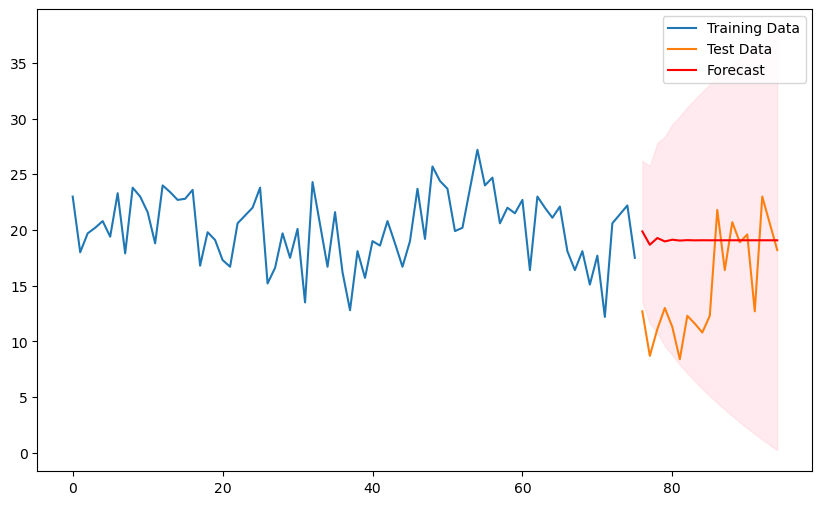

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
file_path = '../data/processed/cleaned_dataset_v55.csv'
df = pd.read_csv(file_path)

# Split data for Fair_Poor (80% train, 20% test)
train_size = int(len(df['Fair_Poor']) * 0.8)
train, test = df['Fair_Poor'][:train_size], df['Fair_Poor'][train_size:]

# Fit ARIMA model (based on ACF/PACF interpretation)
model = ARIMA(train.dropna(), order=(1, 1, 0))
result = model.fit()

# Display model summary
print(result.summary())

# Forecast using the test set
forecast = result.get_forecast(steps=len(test))
forecast_ci = forecast.conf_int()

# Align forecast index with integer-based index
forecast_index = np.arange(len(train), len(train) + len(test))
forecast_mean = forecast.predicted_mean.values
forecast_ci = forecast.conf_int().values

# Plot forecast vs actual
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast_ci[:, 0],
                 forecast_ci[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()


## Seasonality Check for Fair_Poor

In [4]:
# Ljung-Box Test to check seasonality

from statsmodels.stats.diagnostic import acorr_ljungbox

# Test for seasonality using Ljung-Box Test (lags = 4 for quarterly data)
lb_test = acorr_ljungbox(train.dropna(), lags=[4], return_df=True)
print(lb_test)


     lb_stat  lb_pvalue
4  17.377453   0.001632


In [5]:
# statistically significant p-value of 0.0016 (< 0.05).
# Seasonality is present at a quarterly level


## Fit SARIMA model for Fair_poor

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.40482D+00    |proj g|=  7.29930D-02

At iterate    5    f=  2.40121D+00    |proj g|=  1.01665D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   4.854D-06   2.401D+00
  F =   2.4012057369991315     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                                     
Dep. Variable:                         Fai

 This problem is unconstrained.


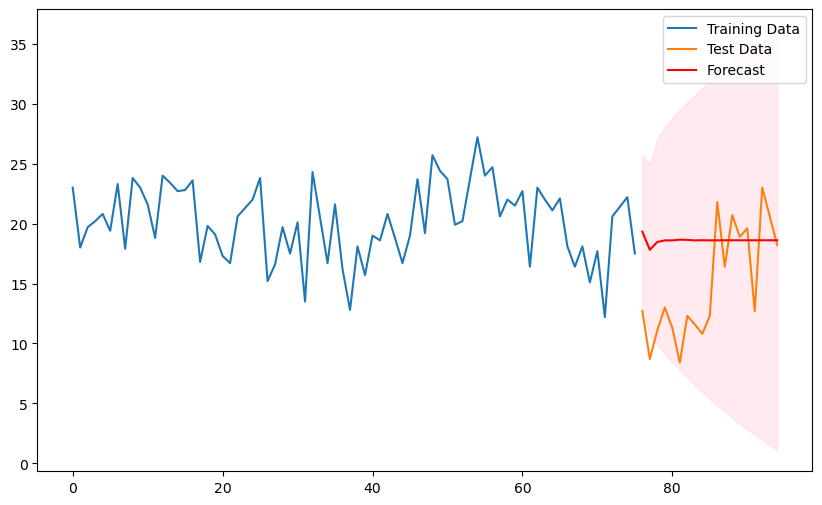

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model on training data
model = SARIMAX(train.dropna(),
                order=(1, 1, 0),
                seasonal_order=(1, 0, 0, 4),
                enforce_stationarity=False,
                enforce_invertibility=False)
result = model.fit()

# Display model summary
print(result.summary())

# Forecast using the test set
forecast = result.get_forecast(steps=len(test))
forecast_ci = forecast.conf_int()

# Align forecast index with integer-based index
forecast_index = np.arange(len(train), len(train) + len(test))
forecast_mean = forecast.predicted_mean.values
forecast_ci = forecast.conf_int().values

# Plot forecast vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast_ci[:, 0],
                 forecast_ci[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()


### Adjust SARIMA Order and Check Again

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.36564D+00    |proj g|=  7.97220D-02

At iterate    5    f=  2.20003D+00    |proj g|=  6.82022D-02

At iterate   10    f=  2.18389D+00    |proj g|=  2.46072D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     16      1     0     0   4.280D-06   2.184D+00
  F =   2.1838872336941244     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                  

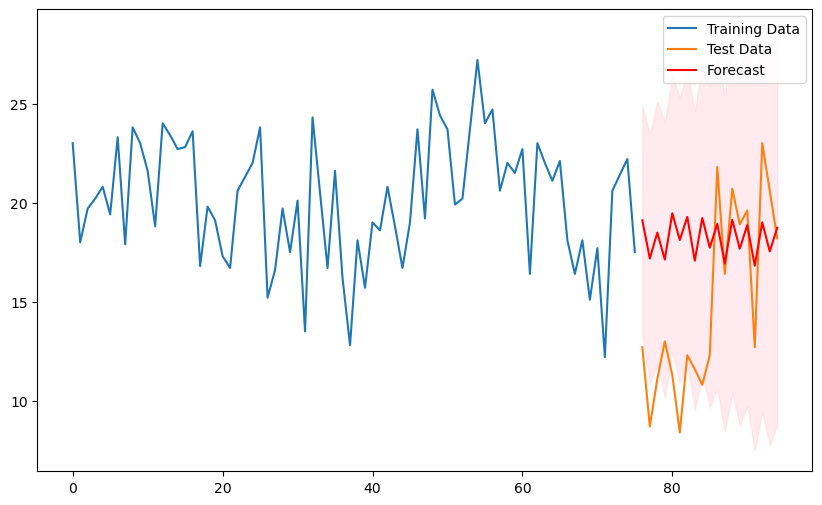

In [9]:
#adjusted SARIMA
# Adjusting SARIMA order to include seasonal MA component and seasonal differencing
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model on training data
model = SARIMAX(train.dropna(),
                order=(1, 1, 1),               # Add MA term
                seasonal_order=(1, 1, 1, 4),   # Add seasonal differencing and MA term
                enforce_stationarity=False,
                enforce_invertibility=False)

result = model.fit()

# Display model summary
print(result.summary())

# Forecast using the test set
forecast = result.get_forecast(steps=len(test))
forecast_ci = forecast.conf_int()

# Align forecast index with integer-based index
forecast_index = np.arange(len(train), len(train) + len(test))
forecast_mean = forecast.predicted_mean.values
forecast_ci = forecast.conf_int().values

# Plot forecast vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast_ci[:, 0],
                 forecast_ci[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()


### Fit Multiplicative SARIMA model

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.36564D+00    |proj g|=  7.97220D-02

At iterate    5    f=  2.20003D+00    |proj g|=  6.82022D-02

At iterate   10    f=  2.18389D+00    |proj g|=  2.46072D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     16      1     0     0   4.280D-06   2.184D+00
  F =   2.1838872336941244     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                  

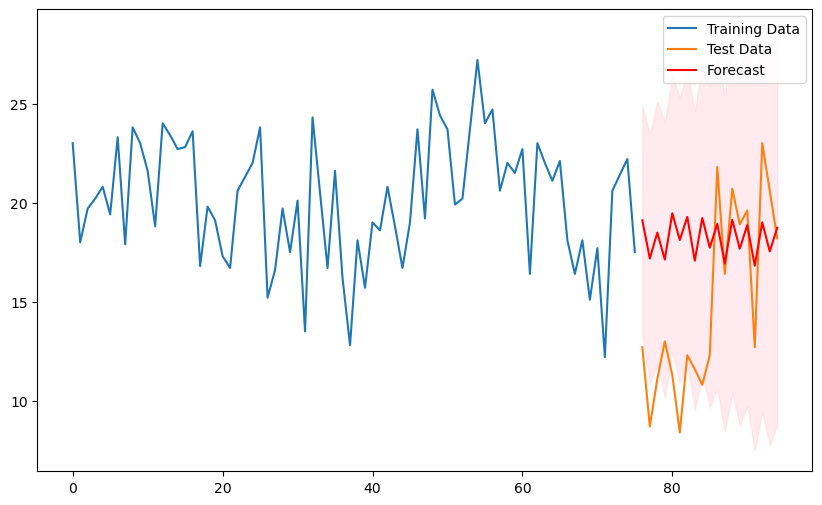

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit Multiplicative SARIMA model on training data
model = SARIMAX(train.dropna(),
                order=(1, 1, 1),               # Non-seasonal order
                seasonal_order=(1, 1, 1, 4),   # Seasonal order (quarterly)
                trend='n',                     # No external trend
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit the model
result = model.fit()

# Display model summary
print(result.summary())

# Forecast using the test set
forecast = result.get_forecast(steps=len(test))
forecast_ci = forecast.conf_int()

# Align forecast index with integer-based index
import numpy as np
forecast_index = np.arange(len(train), len(train) + len(test))
forecast_mean = forecast.predicted_mean.values
forecast_ci = forecast.conf_int().values

# Plot forecast vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast_ci[:, 0],
                 forecast_ci[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()


## Fit SARIMAX for Fair_poor

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.26380D+00    |proj g|=  7.28022D-02

At iterate    5    f=  2.14219D+00    |proj g|=  5.95181D-02

At iterate   10    f=  2.12460D+00    |proj g|=  2.17358D-02

At iterate   15    f=  2.11792D+00    |proj g|=  2.80390D-01


 This problem is unconstrained.



At iterate   20    f=  2.11747D+00    |proj g|=  8.17189D-02

At iterate   25    f=  2.11345D+00    |proj g|=  5.22292D-01

At iterate   30    f=  2.09878D+00    |proj g|=  1.31781D-01

At iterate   35    f=  2.09573D+00    |proj g|=  2.00079D-01

At iterate   40    f=  2.09514D+00    |proj g|=  1.06468D-02

At iterate   45    f=  2.09492D+00    |proj g|=  2.03215D-01

At iterate   50    f=  2.09479D+00    |proj g|=  2.50237D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     68      1     0     0   2.502D-02   2.095D+00
  F =   2.0947885706361573     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


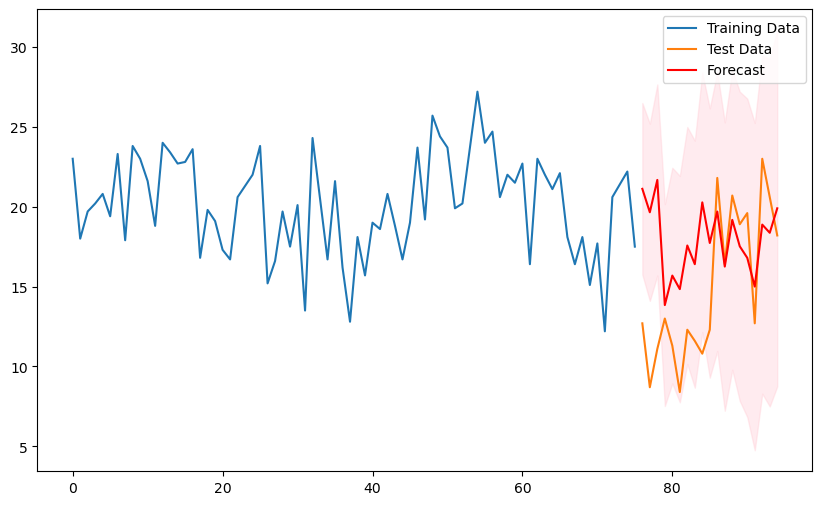

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define independent variables (exog)
exog = df[['Quarterly Sum Precip (mm)_diff', 'CPI Compounded_diff',
           'Debt_to_Asset_Ratio_diff', 'Mortgage_Debt_to_Real_Estate_Ratio_diff',
           'Depression_diff', 'Anxiety_diff', 'Stress_diff', 
           'Unemployment Rate_diff', 'Quarterly Avg Temp (°C)_diff',
           'Therapy_diff2']]

# Split exog into train and test
exog_train = exog.iloc[:train_size]
exog_test = exog.iloc[train_size:]

# Fit SARIMAX model with exogenous variables
model = SARIMAX(train.dropna(),
                exog=exog_train,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 4),
                enforce_stationarity=False,
                enforce_invertibility=False)

result = model.fit()

# Display model summary
print(result.summary())

# Forecast using the test set
forecast = result.get_forecast(steps=len(test), exog=exog_test)
forecast_ci = forecast.conf_int()

# Align forecast index with integer-based index
import numpy as np
forecast_index = np.arange(len(train), len(train) + len(test))
forecast_mean = forecast.predicted_mean.values
forecast_ci = forecast.conf_int().values

# Plot forecast vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast_ci[:, 0],
                 forecast_ci[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()


### Drop Seasonal AR for SARIMAX

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22945D+00    |proj g|=  9.28179D-02

At iterate    5    f=  2.12808D+00    |proj g|=  3.01624D-02

At iterate   10    f=  2.10755D+00    |proj g|=  5.66663D-02

At iterate   15    f=  2.09006D+00    |proj g|=  2.72175D-02

At iterate   20    f=  2.08561D+00    |proj g|=  8.55281D-03

At iterate   25    f=  2.08074D+00    |proj g|=  3.15049D-03

At iterate   30    f=  2.07815D+00    |proj g|=  1.26614D-02

At iterate   35    f=  2.07446D+00    |proj g|=  1.90167D-02

At iterate   40    f=  2.06597D+00    |proj g|=  8.12425D-03

At iterate   45    f=  2.06322D+00    |proj g|=  5.87924D-03

At iterate   50    f=  2.06041D+00    |proj g|=  3.36747D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                         Fair_Poor   No. Observations:                   76
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 4)   Log Likelihood                -156.592
Date:                           Tue, 01 Apr 2025   AIC                            341.183
Time:                                   17:33:00   BIC                            371.624
Sample:                                        0   HQIC                           353.194
                                            - 76                                         
Covariance Type:                             opg                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Quarterly Sum Precip (mm)_diff              0.2864      0.337   

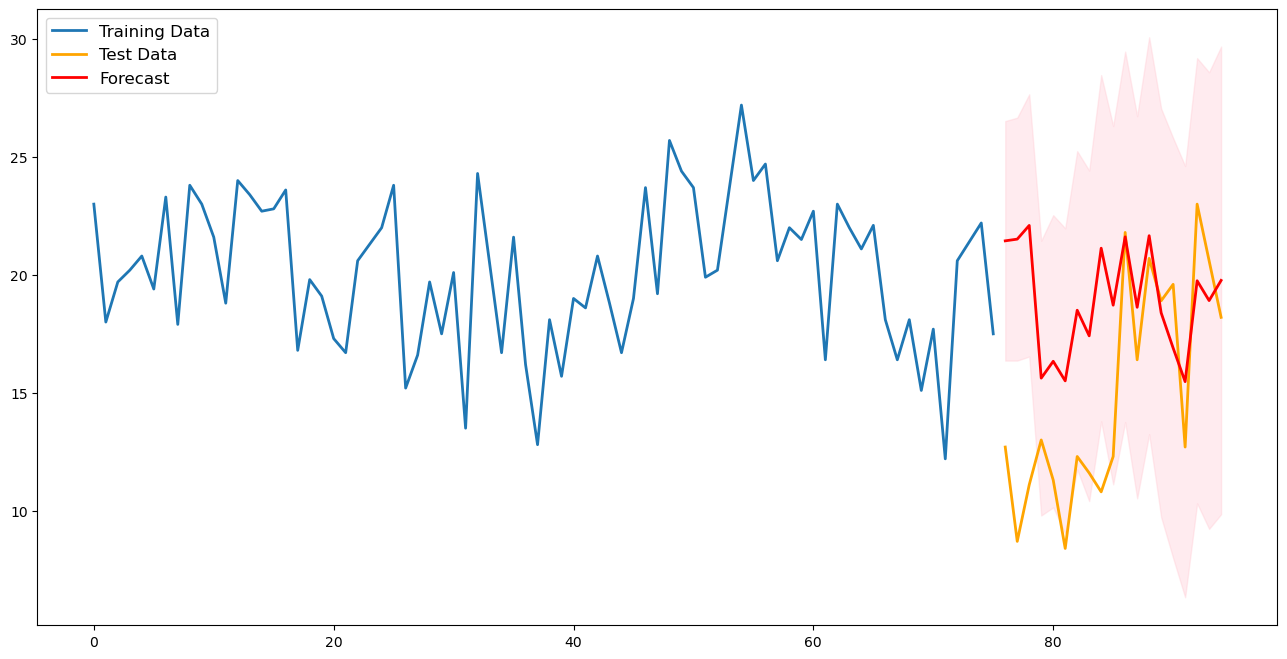

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import matplotlib.pyplot as plt

# Define independent variables (exog)
exog = df[['Quarterly Sum Precip (mm)_diff', 'CPI Compounded_diff',
           'Debt_to_Asset_Ratio_diff', 'Mortgage_Debt_to_Real_Estate_Ratio_diff',
           'Depression_diff', 'Anxiety_diff', 'Stress_diff', 
           'Unemployment Rate_diff', 'Quarterly Avg Temp (°C)_diff',
           'Therapy_diff2']]

# Split exog into train and test
exog_train = exog.iloc[:train_size]
exog_test = exog.iloc[train_size:]

# Fit SARIMAX model with dropped seasonal AR (P = 0)
model = SARIMAX(train.dropna(),
                exog=exog_train,
                order=(1, 1, 1),
                seasonal_order=(0, 1, 1, 4),  # Drop seasonal AR term
                enforce_stationarity=False,
                enforce_invertibility=False)

result = model.fit()

# Display model summary
print(result.summary())

# Forecast using the test set
forecast = result.get_forecast(steps=len(test), exog=exog_test)
forecast_ci = forecast.conf_int()

# Align forecast index with integer-based index
forecast_index = np.arange(len(train), len(train) + len(test))
forecast_mean = forecast.predicted_mean.values
forecast_ci = forecast.conf_int().values

# ✅ Updated Plot to Remove Scrollbar
plt.figure(figsize=(16, 8))  # Increased size for better visibility
plt.plot(train.index, train, label='Training Data', linewidth=2)
plt.plot(test.index, test, label='Test Data', linewidth=2, color='orange')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red', linewidth=2)
plt.fill_between(forecast_index,
                 forecast_ci[:, 0],
                 forecast_ci[:, 1], color='pink', alpha=0.3)

# ✅ Adjust legend position and font size
plt.legend(loc='upper left', fontsize=12)

# ✅ Save high-quality plot without scrollbars
plt.savefig('forecast_plot.png', dpi=300, bbox_inches='tight')

# ✅ Show plot directly in Jupyter Notebook without scrollbars
plt.show()


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22945D+00    |proj g|=  9.28179D-02

At iterate    5    f=  2.12808D+00    |proj g|=  3.01624D-02

At iterate   10    f=  2.10755D+00    |proj g|=  5.66663D-02

At iterate   15    f=  2.09006D+00    |proj g|=  2.72175D-02

At iterate   20    f=  2.08561D+00    |proj g|=  8.55281D-03

At iterate   25    f=  2.08074D+00    |proj g|=  3.15049D-03

At iterate   30    f=  2.07815D+00    |proj g|=  1.26614D-02

At iterate   35    f=  2.07446D+00    |proj g|=  1.90167D-02

At iterate   40    f=  2.06597D+00    |proj g|=  8.12425D-03

At iterate   45    f=  2.06322D+00    |proj g|=  5.87924D-03

At iterate   50    f=  2.06041D+00    |proj g|=  3.36747D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


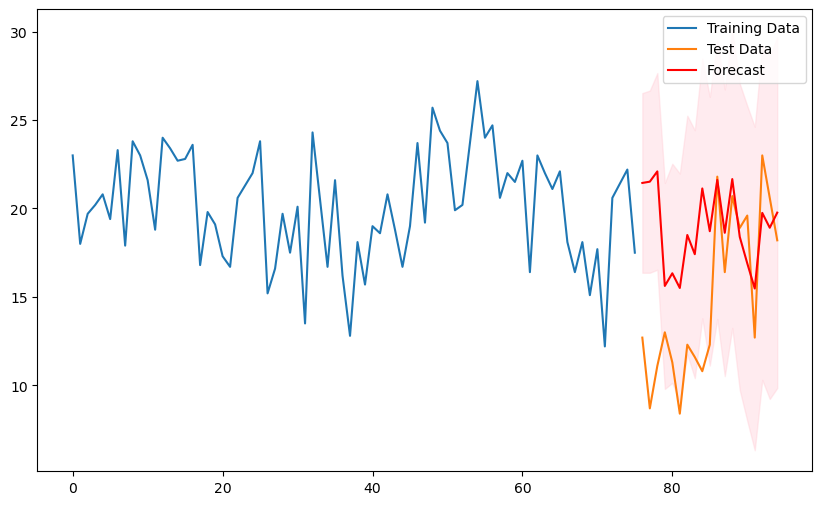

In [33]:
#Drop Seasonal AR → Lowest AIC and BIC = Best balance between model complexity and performance ✅

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define independent variables (exog)
exog = df[['Quarterly Sum Precip (mm)_diff', 'CPI Compounded_diff',
           'Debt_to_Asset_Ratio_diff', 'Mortgage_Debt_to_Real_Estate_Ratio_diff',
           'Depression_diff', 'Anxiety_diff', 'Stress_diff', 
           'Unemployment Rate_diff', 'Quarterly Avg Temp (°C)_diff',
           'Therapy_diff2']]

# Split exog into train and test
exog_train = exog.iloc[:train_size]
exog_test = exog.iloc[train_size:]

# Fit SARIMAX model with dropped seasonal AR (P = 0)
model = SARIMAX(train.dropna(),
                exog=exog_train,
                order=(1, 1, 1),
                seasonal_order=(0, 1, 1, 4),  # Drop seasonal AR term
                enforce_stationarity=False,
                enforce_invertibility=False)

result = model.fit()

# Display model summary
print(result.summary())

# Forecast using the test set
forecast = result.get_forecast(steps=len(test), exog=exog_test)
forecast_ci = forecast.conf_int()

# Align forecast index with integer-based index
import numpy as np
forecast_index = np.arange(len(train), len(train) + len(test))
forecast_mean = forecast.predicted_mean.values
forecast_ci = forecast.conf_int().values

# Plot forecast vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast_ci[:, 0],
                 forecast_ci[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()


In [35]:
#export df
import os
import pandas as pd

# Ensure output directory exists
output_dir = '../data/processed/'
os.makedirs(output_dir, exist_ok=True)

# Combine actuals: training + test
full_actual = pd.concat([train, test])
full_actual.name = 'Actual'

# Combine predicted: training + forecast
forecast_series = pd.Series(forecast_mean, index=forecast_index)
full_predicted = pd.concat([train, forecast_series])
full_predicted.name = 'Actual + Forecast'

# Build DataFrame for export
export_combined = pd.DataFrame({
    'Actual': full_actual,
    'Predicted': full_predicted
})

# Add confidence intervals only for forecast portion
lower_ci = pd.Series(forecast_ci[:, 0], index=forecast_index)
upper_ci = pd.Series(forecast_ci[:, 1], index=forecast_index)

export_combined['Lower_CI'] = pd.concat([pd.Series([None] * len(train), index=train.index), lower_ci])
export_combined['Upper_CI'] = pd.concat([pd.Series([None] * len(train), index=train.index), upper_ci])

# Export to CSV
export_combined.to_csv(os.path.join(output_dir, 'sarima_actual_vs_forecast_all_inde_fair_poor.csv'))

print("Export completed: '../data/processed/sarima_actual_vs_forecast_all_inde_fair_poor.csv'")



Export completed: '../data/processed/sarima_actual_vs_forecast_all_inde_fair_poor.csv'


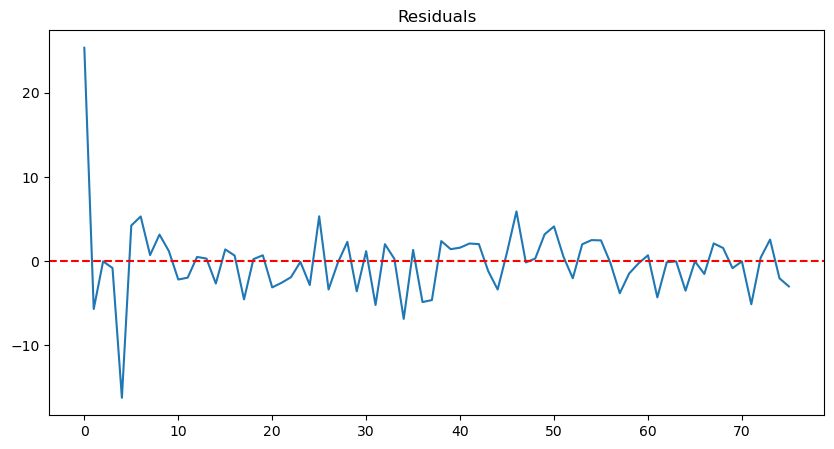

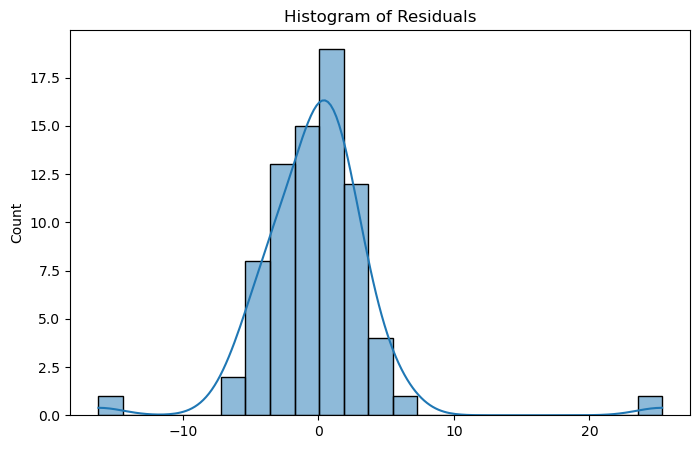

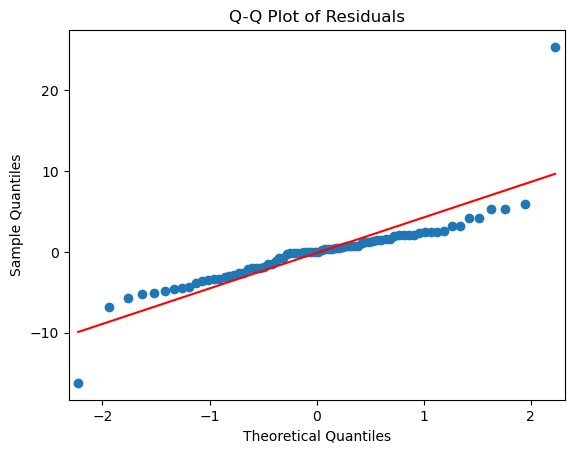

<Figure size 800x500 with 0 Axes>

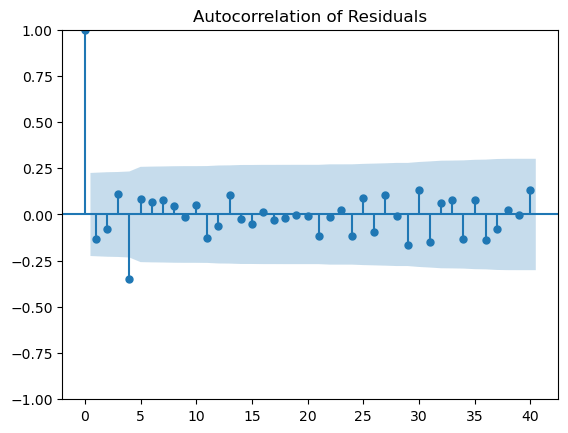


Ljung-Box Test:
      lb_stat  lb_pvalue
10  14.776718   0.140417


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# 1. Plot residuals
plt.figure(figsize=(10, 5))
plt.plot(result.resid)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals')
plt.show()

# 2. Histogram of residuals (distribution check)
plt.figure(figsize=(8, 5))
sns.histplot(result.resid, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# 3. Q-Q Plot (normality check)
qqplot(result.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# 4. Autocorrelation of residuals (correlation check)
plt.figure(figsize=(8, 5))
plot_acf(result.resid, lags=40)
plt.title('Autocorrelation of Residuals')
plt.show()

# 5. Ljung-Box Test (white noise check)
lb_test = acorr_ljungbox(result.resid, lags=[10], return_df=True)
print("\nLjung-Box Test:")
print(lb_test)


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29194D+00    |proj g|=  1.42914D-01

At iterate    5    f=  2.14073D+00    |proj g|=  3.36700D-02

At iterate   10    f=  2.10945D+00    |proj g|=  7.92287D-02

At iterate   15    f=  2.07755D+00    |proj g|=  1.79792D-02

At iterate   20    f=  2.07293D+00    |proj g|=  5.00432D-03

At iterate   25    f=  2.07089D+00    |proj g|=  2.51299D-02

At iterate   30    f=  2.07007D+00    |proj g|=  6.57142D-03

At iterate   35    f=  2.06985D+00    |proj g|=  1.74882D-03

At iterate   40    f=  2.06941D+00    |proj g|=  5.79551D-03

At iterate   45    f=  2.06620D+00    |proj g|=  1.85599D-02

At iterate   50    f=  2.05523D+00    |proj g|=  6.35406D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


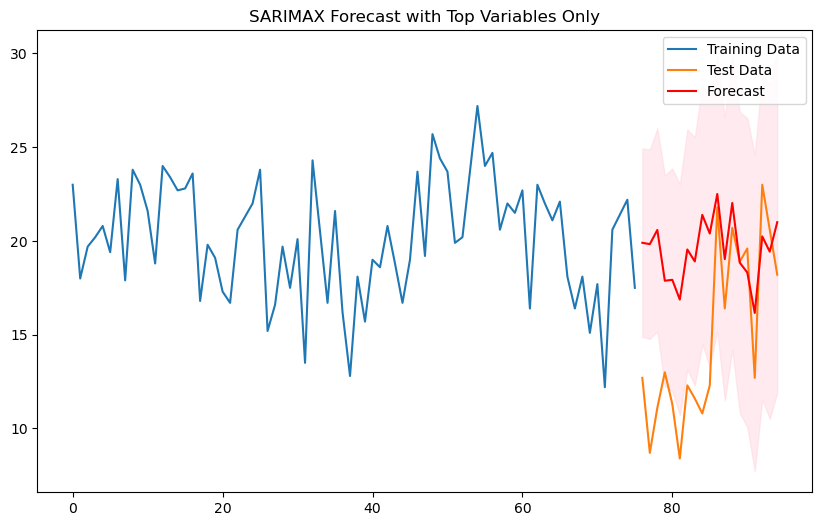

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Select only the most significant independent variables
significant_vars = ['CPI Compounded_diff', 'Debt_to_Asset_Ratio_diff',
                    'Depression_diff', 'Anxiety_diff', 'Stress_diff',
                    'Quarterly Avg Temp (°C)_diff']

exog_filtered = df[significant_vars]
exog_train = exog_filtered.iloc[:train_size]
exog_test = exog_filtered.iloc[train_size:]

# Fit SARIMAX model with filtered variables
model = SARIMAX(train.dropna(),
                exog=exog_train,
                order=(1, 1, 1),
                seasonal_order=(0, 1, 1, 4),
                enforce_stationarity=False,
                enforce_invertibility=False)

result = model.fit()
print(result.summary())

# Forecast
forecast = result.get_forecast(steps=len(test), exog=exog_test)
forecast_ci = forecast.conf_int()

# Align index for plotting
forecast_index = np.arange(len(train), len(train) + len(test))
forecast_mean = forecast.predicted_mean.values
forecast_ci = forecast_ci.values

# Plot forecast vs actual
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast_ci[:, 0],
                 forecast_ci[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title("SARIMAX Forecast with Top Variables Only")
plt.show()


In [39]:
# Ensure output directory exists
output_dir = '../data/processed/'
os.makedirs(output_dir, exist_ok=True)

# Combine actuals: training + test
full_actual = pd.concat([train, test])
full_actual.name = 'Actual'

# Combine predicted: training + forecast
forecast_series = pd.Series(forecast_mean, index=forecast_index)
full_predicted = pd.concat([train, forecast_series])
full_predicted.name = 'Actual + Forecast'

# Build DataFrame for export
export_combined = pd.DataFrame({
    'Actual': full_actual,
    'Predicted': full_predicted
})

# Add confidence intervals only for forecast portion
lower_ci = pd.Series(forecast_ci[:, 0], index=forecast_index)
upper_ci = pd.Series(forecast_ci[:, 1], index=forecast_index)

export_combined['Lower_CI'] = pd.concat([pd.Series([None] * len(train), index=train.index), lower_ci])
export_combined['Upper_CI'] = pd.concat([pd.Series([None] * len(train), index=train.index), upper_ci])

# Export to CSV
export_path = os.path.join(output_dir, 'sarima_actual_vs_forecast_partial_inde_fair_poor.csv')
export_combined.to_csv(export_path)

print(f"Export completed: '{export_path}'")


Export completed: '../data/processed/sarima_actual_vs_forecast_partial_inde_fair_poor.csv'
